# Participants' and mentors' feedback to Cohort Survey

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from textwrap import wrap

In [2]:
def get_mcq_answer_counts(col, df):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    return q.explode().value_counts()

def get_mcq_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    value_counts = q.explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

def get_question_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # get unique items & counts
    value_counts = df[col].explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            print(value_counts)
            other_answers.append(a)
            if 'Other' in answer_counts:
                answer_counts['Other'] += v
    return answer_counts, other_answers

In [3]:
colors = {
    "participants": "#3182bd",
    "participant_colormap": "winter",
    "mentors": "#fd8d3c",
    "mentor_colormap": "winter",
}

## Participants’ Feedback to Cohort Survey

96.8% of participants (mean over the 8 cohorts; min = 91.9, max = 100) who responded to the feedback survey (number of answers over the 8 cohorts; mid-cohort: mean=20.5, min=11, max=33; post-cohort: mean=28.6, min=19, max=37) would recommend Open Seeds to others. 77.3% of respondents found that the mentoring calls were always useful (mean over the 8 cohorts; min = 63.6, max=87.1). Regarding the cohort calls, 46.4% of respondents found them always useful (min = 38.4, max=61.1) and 42.1% mostly useful (min = 30.6, max=50). Topics under open science, project management, community interactions, mental health, tooling for collaboration and project design approaches were considered important to the participants’ open science journey. The program helped mentees work openly and to meet most of their project goals they intended to meet during their participation in the cohort. 22% of respondents indicated they would like to return as mentors (min=11.9, max=28.3), 12.2% as experts (min=3, max=21.9), and 9.1% as facilitators (min=0, max=18.9). Around 30% of graduates re-joined the subsequent cohort in different roles. Even when not actively engaging with the ongoing program, participants from previous cohorts remain engaged via the community Slack workspace, sharing opportunities, responding to questions or accessing information shared by others.

Statistic of the number of answer for the mid-cohort survey

In [4]:
participant_mid_df = {}
answers = {}
for c in range(1, 9):
    participant_mid_df[c] = (pd.read_csv(Path(f"../data/participant_feedback/mid_cohort/OLS-{c}.csv"))
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(f"OLS-{c}", "cohort", regex=True)
        .replace("Information on before, during and after the call", "Information on before during and after the call", regex=True)
        .replace(" on the google doc", "", regex=True)
        .replace("I have attended 1-2 cohort calls, and watched the missed call on YouTube", "I have attended 1-2 cohort calls and watched the missed call on YouTube", regex=True)
        .replace("I watched all the cohort calls on YouTube, but have not attended any call so far", "I watched all the cohort calls on YouTube but have not attended any call so far", regex=True)
    )
    answers[c] = participant_mid_df[c].shape[0]
pd.DataFrame([answers]).transpose().describe()

,0
count,8.000000
mean,20.500000
std,8.618916
min,11.000000
25%,13.750000
50%,19.000000
75%,25.250000
max,33.000000


Statistic of the number of answer for the post-cohort survey

In [5]:
participant_df = {}
answers = {}
for c in range(1, 9):
    participant_df[c] = (
        pd.read_csv(Path(f"../data/participant_feedback/post_cohort/OLS-{c}.csv"))
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(f"OLS-{c}", "cohort", regex=True)
        # q1                 
        .replace("I was able to meet ALL my project goals", "I was able to meet ALL my goals", regex=True)
        .replace("I worked consistently on my project, and met part of my goals", "I was able to meet MOST of my goals", regex=True)
        .replace("I was able to meet MOST of my goals.", "I was able to meet MOST of my goals", regex=True)
        # q4
        ## renaming (see below)
        .replace("Tooling and Roadmapping \(open canvas, project vision etc\.\)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Licensing and Code of Conduct", "Open Licensing, Code of Conduct", regex=True)
        .replace("GitHub and README files", "README, GitHub Introduction", regex=True)
        .replace("Project development: Agile and iterative project management methods & Open Aspects", "Agile & Iteractive Project Management", regex=True)
        .replace("Knowledge Dissemination: Preprints, Training and Code Publishing", "Open Access Publication, Open Educational Resources, Open Source Software", regex=True)
        .replace("Data management plans, software citation", "Open Data", regex=True)
        .replace("Citizen Science", "Open Engagement of Social Actors", regex=True)
        .replace("citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Diversity & Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Mountain of engagement and Community interactions", "Mountain of Engagement, Community Interactions", regex=True)
        .replace("Persona and pathways and inviting contributions", "Personas & Pathways", regex=True)
        .replace("Mental health, self care, personal ecology", "Personal Ecology", regex=True)
        .replace("Ally skills", "Ally Skills for Open Leaders", regex=True)
        .replace("Open Leadership: Career Guidance call", "Open Leadership in Practice", regex=True)
        .replace("Open office/co-working hours and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Final presentation rehearsals", "Graduation rehearsals", regex=True)
        .replace("Final presentation call \(open and live streamed\)", "Graduations", regex=True)
        ## cleaning
        .replace("Tooling and Roadmapping \(\)", "Project Roadmapping, Open Canvas", regex=True)
        #.replace("Tooling and Roadmapping(open canvas, project vision etc.)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Designing for inclusion: Implicit bias", "Community Design for Inclusivity", regex=True)
        .replace("Diversity and Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Preprints", "Open Access Publication", regex=True)
        .replace("open protocols", "Open Evaluation", regex=True)
        .replace("Knowledge Dissemination: Citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Knowledge Dissemination: open education", "Open Educational Resources", regex=True)
        .replace("Knowledge Dissemination: Open Access Publication", "Open Access Publication", regex=True)
        .replace("open education", "Open Educational Resources", regex=True)
        .replace("Open agenda and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Career Guidance calls", "Open Leadership in Practice", regex=True)
        .replace("Applying FAIR principles on research components", "Open Data", regex=True)
        # q5
        .replace("I am not sure yet, but ask me later when you have launched OLS-2", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later when you have launched cohort", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later", "I am not sure yet but ask me later", regex=True)
        .replace("Yes I'd like to return as a collaborator to run an OLS cohort for my network", "Yes I'd like to return as a collaborator to run this program in my network", regex=True)
        .replace("No, I would not be able to return to OLS-2", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to cohort", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to OLS-4", "No I would not be able to return", regex=True)
        .replace("I would not be able to return to OLS-3 but I am hopeful to return to OLS-4 with an active role.", "I would take a break but please keep me informed about the next cohort", regex=True)
        .replace("No, but only because I really would not have the time", "No I would not be able to return", regex=True)
        .replace("Maybe in OLS-7?", "I would take a break but please keep me informed about the next cohort", regex=True)   
    )
    answers[c] = participant_df[c].shape[0]
pd.DataFrame([answers]).transpose().describe()

<>:15: SyntaxWarning: invalid escape sequence '\('
<>:31: SyntaxWarning: invalid escape sequence '\('
<>:33: SyntaxWarning: invalid escape sequence '\('
<>:15: SyntaxWarning: invalid escape sequence '\('
<>:31: SyntaxWarning: invalid escape sequence '\('
<>:33: SyntaxWarning: invalid escape sequence '\('
/var/folders/k_/5472klmd4fdb_wdkwgm7_n8m0000gp/T/ipykernel_1213/1106160560.py:15: SyntaxWarning: invalid escape sequence '\('
  .replace("Tooling and Roadmapping \(open canvas, project vision etc\.\)", "Project Roadmapping, Open Canvas", regex=True)
/var/folders/k_/5472klmd4fdb_wdkwgm7_n8m0000gp/T/ipykernel_1213/1106160560.py:31: SyntaxWarning: invalid escape sequence '\('
  .replace("Final presentation call \(open and live streamed\)", "Graduations", regex=True)
/var/folders/k_/5472klmd4fdb_wdkwgm7_n8m0000gp/T/ipykernel_1213/1106160560.py:33: SyntaxWarning: invalid escape sequence '\('
  .replace("Tooling and Roadmapping \(\)", "Project Roadmapping, Open Canvas", regex=True)


,0
count,8.00000
mean,28.62500
std,6.52331
min,19.00000
25%,22.75000
50%,30.50000
75%,32.75000
max,37.00000


#### "OLS is helping me work openly"

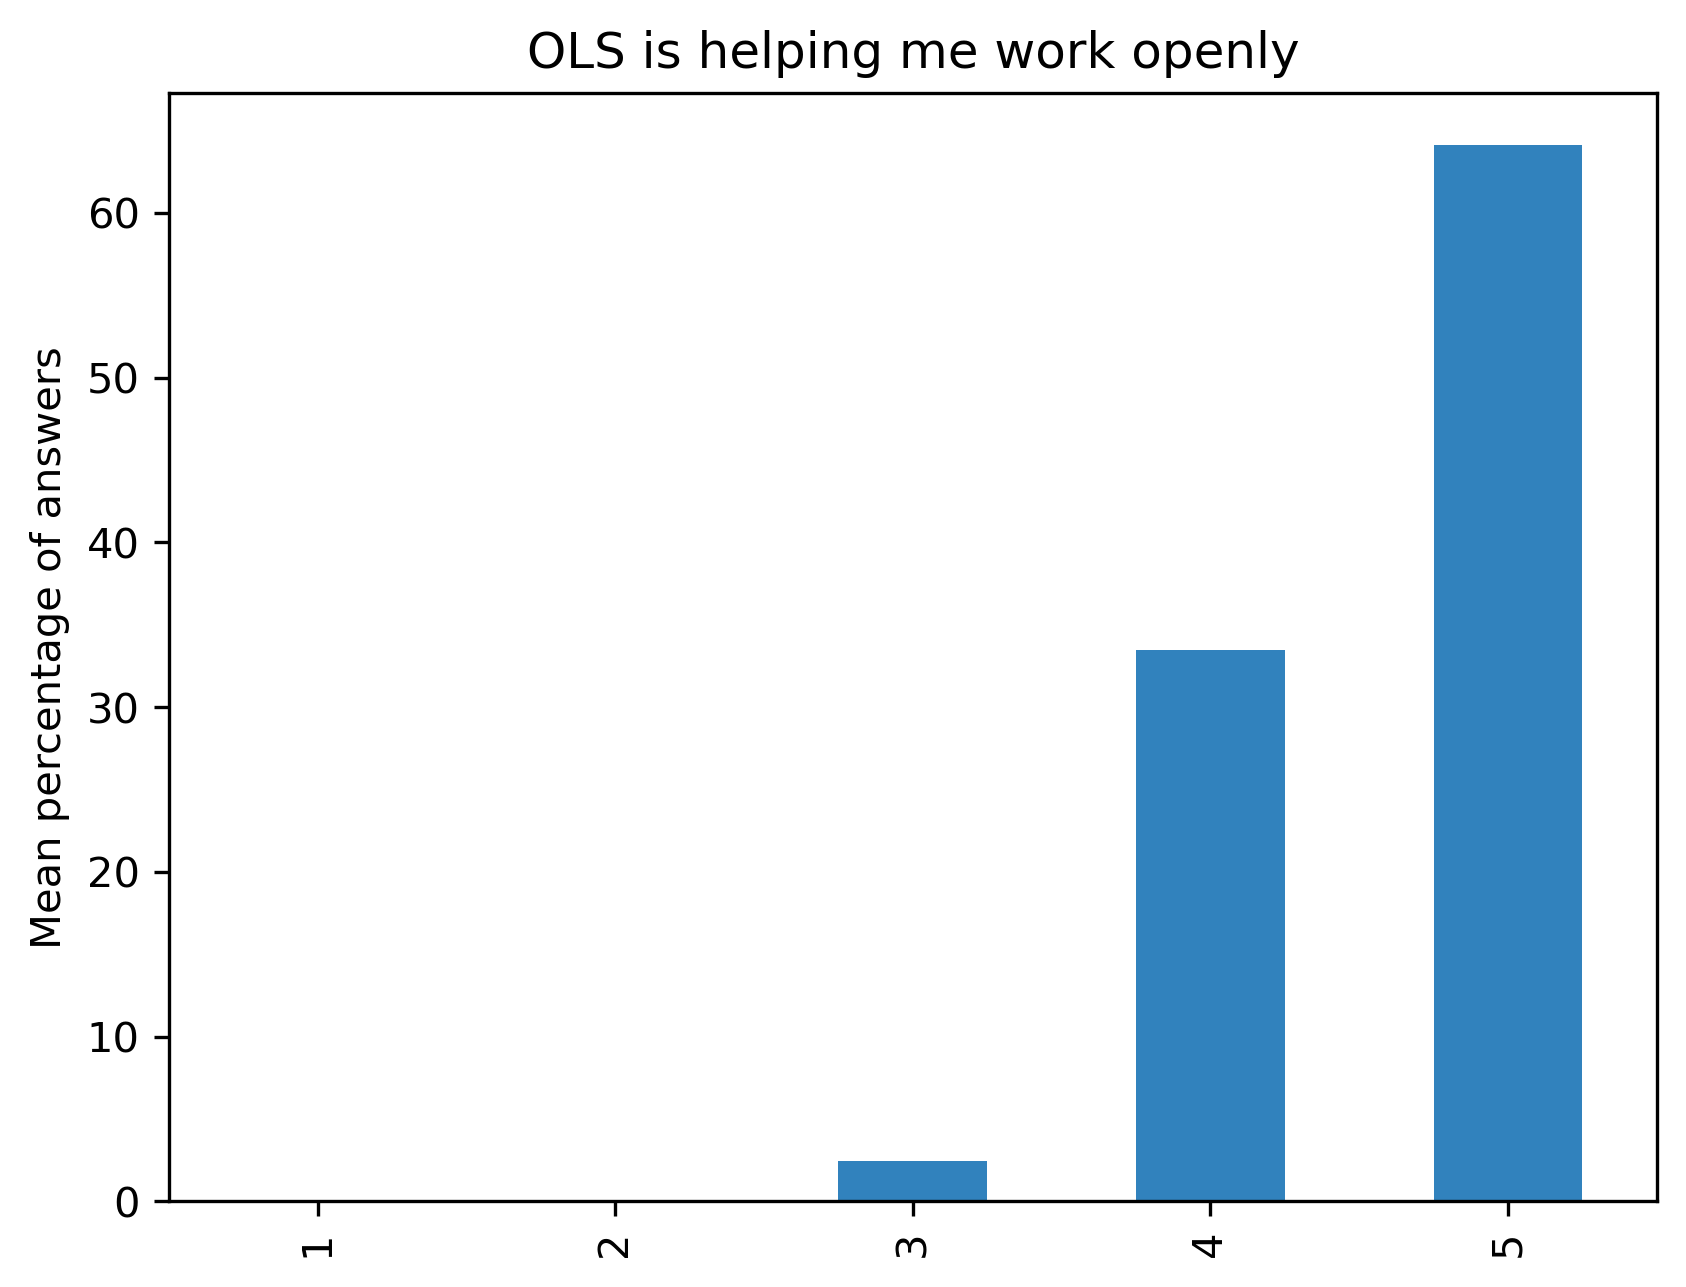

In [6]:
participant_mid_q1 = {}
other_answer = []
col = "OLS is helping me work openly"
answers = list(range(1, 6))
for c in participant_mid_df:
    participant_mid_q1[c], oa = get_question_possible_answers_counts(col, participant_mid_df[c], answers)
    other_answer += oa
participant_mid_q1_df = pd.DataFrame.from_dict(participant_mid_q1)
participant_mid_q1_df = 100 * participant_mid_q1_df / participant_mid_q1_df.sum()

fig, ax = plt.subplots()
fig.set_dpi(300)
participant_mid_q1_df.mean(axis=1).plot.bar(ax=ax, color=colors['participants'])
plt.ylabel('Mean percentage of answers')
t = plt.title(col)

#### "How was your overall project leadership experience in OLS?"

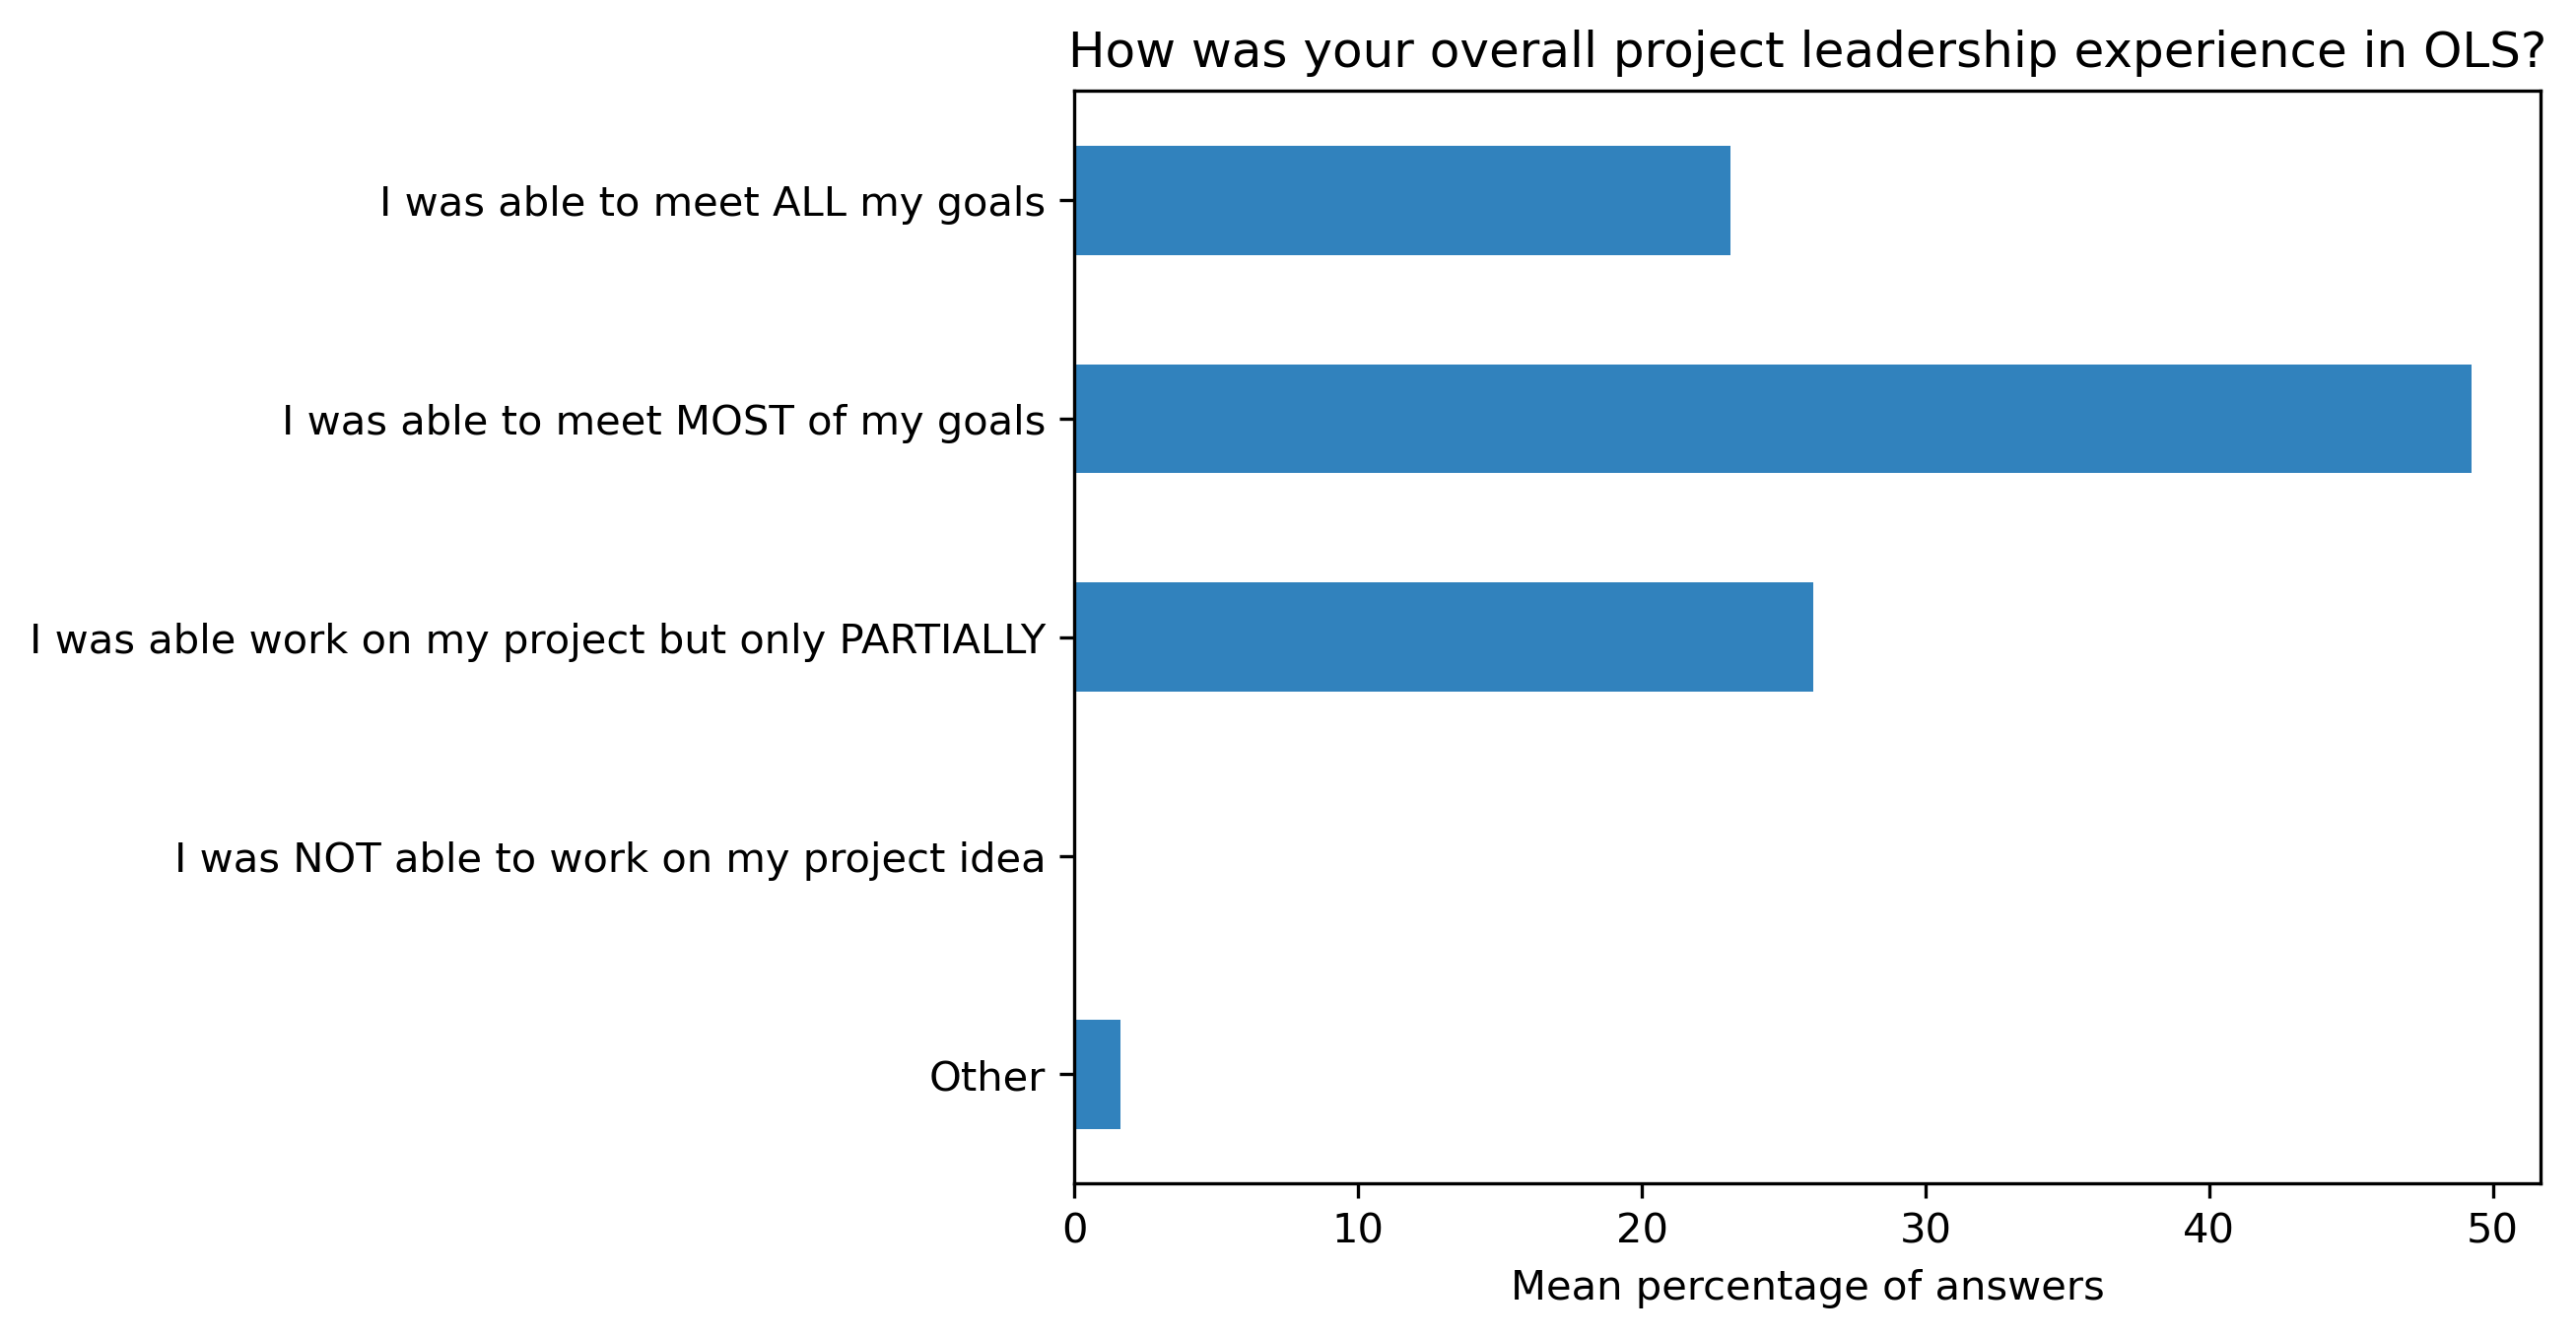

In [7]:
participant_q1 = {}
other_answer = []
col = "How was your overall project leadership experience in OLS?"
answers = [
    "I was able to meet ALL my goals",
    "I was able to meet MOST of my goals",
    "I was able work on my project but only PARTIALLY",
    "I was NOT able to work on my project idea",
    "Other"]
for c in participant_df:
    participant_q1[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q1_df = pd.DataFrame.from_dict(participant_q1)
participant_q1_df = 100 * participant_q1_df / participant_q1_df.sum()

fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q1_df.mean(axis=1).plot.barh(ax=ax, color=colors['participants'])
plt.xlabel('Mean percentage of answers')
plt.gca().invert_yaxis()
t = plt.title(col)

#### "How was your overall experience with the mentor-mentee calls?"

In [8]:
participant_q2 = {}
other_answer = []
col = "How was your overall experience with the mentor-mentee calls?"
answers = [
    "Mentoring calls were always useful",
    "Mentoring calls were mostly useful",
    "Mentoring calls were somewhat useful",
    "Mentoring calls were not useful"]
for c in participant_df:
    participant_q2[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q2_df = pd.DataFrame.from_dict(participant_q2)
participant_q2_df = 100 * participant_q2_df / participant_q2_df.sum()

participant_q2_df.transpose().describe()

,Mentoring calls were always useful,Mentoring calls were mostly useful,Mentoring calls were somewhat useful,Mentoring calls were not useful
count,8.000000,8.000000,8.000000,8.0
mean,77.293648,18.142060,4.564292,0.0
std,8.090147,6.981617,2.123993,0.0
min,63.636364,9.677419,2.702703,0.0
25%,72.901786,12.766714,3.200605,0.0
50%,78.293011,18.010753,3.696237,0.0
75%,83.890469,21.818182,5.375940,0.0
max,87.096774,28.125000,9.090909,0.0


#### "How was your overall experience with the cohort calls?"

In [9]:
participant_q3 = {}
other_answer = []
col = "How was your overall experience with the cohort calls?"
answers = [
    "They were always useful",
    "They were mostly useful",
    "They were somewhat useful",
    "They were not useful for me",
    "I could not attend"]
for c in participant_df:
    participant_q3[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q3_df = pd.DataFrame.from_dict(participant_q3)
participant_q3_df = 100 * participant_q3_df / participant_q3_df.sum()

participant_q3_df.transpose().describe()

,They were always useful,They were mostly useful,They were somewhat useful,They were not useful for me,I could not attend
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,46.422351,42.133035,8.951377,0.347222,2.146014
std,8.696822,6.363809,5.434823,0.982093,3.202608
min,38.461538,30.555556,0.000000,0.000000,0.000000
25%,39.222874,38.221154,5.303030,0.000000,0.000000
50%,44.466403,43.633277,9.035326,0.000000,0.000000
75%,49.629934,46.047431,13.465298,0.000000,3.981855
max,61.111111,50.000000,15.384615,2.777778,7.692308


#### "Which of the following topics introduced in these cohort calls were useful for your open science journey?"

In [10]:
participant_q4 = {}
other_answer = []
col = "Which of the following topics introduced in these cohort calls were useful for your open science journey?"
answers = [
    "OLS Introduction",
    "Open Science Introduction",
    "Open Source Software",
    "Open Data",
    "Open Access Publication",
    "Open Science Infrastructures",
    "Open Educational Resources",
    "Open Engagement of Social Actors",
    "Open Hardware",
    "Open Evaluation",
    "Openness to Diversity of Knowledge",
    "Project Roadmapping",
    "Open Canvas",
    "Code of Conduct",
    "GitHub Introduction",
    "Open Licensing",
    "README",
    "Package Management",
    "Setting up a project",
    "Project Design for Collaboration",
    "Good Coding Practices",
    "Code Review",
    "Agile & Iteractive Project Management",
    "Community Design for Inclusivity",
    "Community Interactions",
    "Mountain of Engagement",
    "Equity Diversity & Inclusion (EDI)",
    "Ally Skills for Open Leaders",
    "Personal Ecology",
    "Personas & Pathways",
    "Open Leadership in Practice",
    "Open office/co-working hours and social calls",
    "Graduation rehearsals",
    "Graduations",
    "Other"]
for c in participant_df:
    participant_q4[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q4_df = pd.DataFrame.from_dict(participant_q4)
participant_q4_df = 100 * participant_q4_df / participant_q4_df.sum()

In [11]:
tag_topic_mapping = (pd.read_csv("https://docs.google.com/spreadsheets/d/1sDJLG8RuoShWUQN78lvx_mghBbGfusdzlb1WwYrCbjk/export?format=csv&gid=0")
    .replace("Equity, Diversity and ", "Equity Diversity & ", regex=True)
    .set_index("Tag")
    .drop(columns=["Description", "Comments from Malvika", "Call in OLS-8", "Type", "Week", "Comments"]))
extra_mapping = (pd.DataFrame({
    'Tag':['Graduation rehearsals', 'Graduations', 'Open office/co-working hours and social calls', 'Other'],
    'Topic':['Graduations','Graduations','Open office/co-working hours and social calls', 'Other']})
    .set_index("Tag"))
tag_topic_mapping = pd.concat([tag_topic_mapping, extra_mapping])

In [12]:
participant_q4_by_topic_df = (participant_q4_df.join(tag_topic_mapping)
    .groupby(by="Topic")
    .sum())

participant_q4_by_topic_df.transpose().describe()

Topic,Graduations,Open Leadership,Open Life Science,Open Science,Open office/co-working hours and social calls,Other,"Project, Community & Personal Management",Tooling for Collaboration,Tooling for Project Design
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,7.526115,3.179774,0.0,17.600075,2.419981,0.489046,32.077831,22.554101,14.153076
std,0.931217,0.772661,0.0,2.206159,0.645965,0.602194,3.554287,1.998936,1.682511
min,6.274510,2.153846,0.0,15.025907,1.639344,0.000000,27.924528,18.461538,12.072435
25%,6.863281,2.574516,0.0,16.352941,2.007120,0.000000,30.343137,21.508463,13.003394
50%,7.722561,3.266507,0.0,17.288559,2.357566,0.167785,30.608035,23.356144,13.787271
75%,8.007772,3.553795,0.0,18.162370,2.699697,1.060221,33.328077,23.955959,15.619351
max,9.056604,4.528302,0.0,22.303922,3.692308,1.408451,39.384615,24.313725,16.470588


#### "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"

In [13]:
participant_q5 = {}
other_answer = []
col = "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a call facilitator",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in participant_df:
    participant_q5[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q5_df = pd.DataFrame.from_dict(participant_q5)
participant_q5_df = 100 * participant_q5_df / participant_q5_df.sum()
participant_q5_df.transpose().describe()

,Yes I'd like to return as a mentor,Yes I'd like to return as an expert,Yes I'd like to return as a call facilitator,Yes I'd like to return as a collaborator to run this program in my network,I am not sure yet but ask me later,I would take a break but please keep me informed about the next cohort,No I would not be able to return,Other
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,22.034092,12.228083,9.101523,11.489957,19.462531,0.240385,4.800587,20.642844
std,5.242456,5.476509,8.392517,5.053336,9.625526,0.679910,5.856813,14.822622
min,11.904762,3.030303,0.000000,3.125000,0.000000,0.000000,0.000000,1.639344
25%,20.596591,9.698026,0.000000,7.656023,17.759146,0.000000,0.000000,10.573899
50%,22.451020,12.019231,10.442073,12.509758,20.794025,0.000000,3.044872,20.362158
75%,24.338942,14.004021,16.461749,14.763489,24.424653,0.000000,7.190760,25.781250
max,28.301887,21.875000,18.867925,18.750000,30.303030,1.923077,16.666667,50.000000


#### "Would you recommend this program to others?"

In [14]:
participant_q6 = {}
other_answer = []
col = "Would you recommend this program to others?"
answers = [
    "Yes", 
    "Maybe",
    "No"]
for c in participant_df:
    participant_q6[c], oa = get_question_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q6_df = pd.DataFrame.from_dict(participant_q6)
participant_q6_df = 100 * participant_q6_df / participant_q6_df.sum()
participant_q6_df.transpose().describe()

,Yes,Maybe,No
count,8.000000,8.000000,8.000000
mean,96.849306,2.793551,0.357143
std,3.122352,3.318000,1.010153
min,91.891892,0.000000,0.000000
25%,95.072464,0.000000,0.000000
50%,96.958525,1.612903,0.000000
75%,100.000000,4.927536,0.000000
max,100.000000,8.108108,2.857143


## Mentors’ Feedback to Cohort Survey

Mentors in Open Seeds are offered onboarding, training, templates for guiding their meetings and private Slack channels to interact with each other. 50.8% of mentors (mean over the 8 cohorts; min=30.8, max=70.4) who answered the feedback survey (over the 8 cohort, mean=20, min=8, max=26) reported that they found the mentor training and support offered in the cohort adequate and 32.8% reported that they enjoyed their experience and did not find their experience overwhelming (min=23.1, max=41.5). Only about 5% reported feeling overwhelmed by their responsibilities with many providing helpful recommendations to improve support and training to help better manage their responsibilities in Open Seeds. Around 80% of the mentors found the mentoring calls with their mentees mostly or always constructive and more than 50% thought their mentees were able to engage effectively with OLS throughout the program. 50% of mentors expressed their interest in returning as experts, speakers or mentors, with most of them effectively coming back in one of the roles in the subsequent cohort.

Statistic of the number of answer

In [15]:
mentor_df = {}
answers = {}
for c in range(1, 8):
    mentor_df[c] = (
        pd.read_csv(Path(f"../data/mentor_feedback/post_cohort/OLS-{c}.csv"))
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(f"OLS-{c}", "cohort",regex=True)
        .replace("I am not sure yet, but ask me later when you have launched OLS-2", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later when you have launched cohort", "I am not sure yet but ask me later", regex=True)
        .replace("I am not sure yet, but ask me later", "I am not sure yet but ask me later", regex=True)
        .replace("Yes I'd like to return as a collaborator to run an OLS cohort for my network", "Yes I'd like to return as a collaborator to run this program in my network", regex=True)
        .replace("No, I would not be able to return to OLS-2", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to cohort", "No I would not be able to return", regex=True)
        .replace("No, I would not be able to return to OLS-4", "No I would not be able to return", regex=True)
        .replace("I would not be able to return to OLS-3 but I am hopeful to return to OLS-4 with an active role.", "I would take a break but please keep me informed about the next cohort", regex=True)
        .replace("No, but only because I really would not have the time", "No I would not be able to return", regex=True)
        .replace("Maybe in OLS-7?", "I would take a break but please keep me informed about the next cohort", regex=True)
    )
    answers[c] = mentor_df[c].shape[0]
pd.DataFrame([answers]).transpose().describe()

,0
count,7.000000
mean,20.142857
std,6.202918
min,8.000000
25%,18.500000
50%,21.000000
75%,24.500000
max,26.000000


#### "How were your overall mentorship training and support experience in OLS?"

In [16]:
mentor_q1 = {}
other_answer = []
col = "How were your overall mentorship training and support experience in OLS?"
answers = [
    "I felt supported as a mentor and the training offered in the cohort was adequate",
    "I felt supported as a mentor but the training offered in the cohort can be improved",
    "I enjoyed my participation and did not find the experience overwhelming",
    "I found the mentorship responsibilities overwhelming",
    "I did not feel supported as a mentor",
    "Other"]
for c in mentor_df:
    mentor_q1[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q1_df = pd.DataFrame.from_dict(mentor_q1)
mentor_q1_df = 100 * mentor_q1_df / mentor_q1_df.sum()
mentor_q1_df.transpose().describe()

,I felt supported as a mentor and the training offered in the cohort was adequate,I felt supported as a mentor but the training offered in the cohort can be improved,I enjoyed my participation and did not find the experience overwhelming,I found the mentorship responsibilities overwhelming,I did not feel supported as a mentor,Other
count,7.000000,7.000000,7.000000,7.000000,7.0,7.000000
mean,50.804760,4.983076,32.805844,0.348432,0.0,11.057888
std,12.633986,8.108650,7.042051,0.921865,0.0,8.169870
min,30.769231,0.000000,23.076923,0.000000,0.0,0.000000
25%,45.731707,1.219512,27.436647,0.000000,0.0,5.795455
50%,51.515152,2.631579,33.333333,0.000000,0.0,12.121212
75%,55.757576,3.367003,38.446970,0.000000,0.0,15.308087
max,70.370370,23.076923,41.463415,2.439024,0.0,23.076923


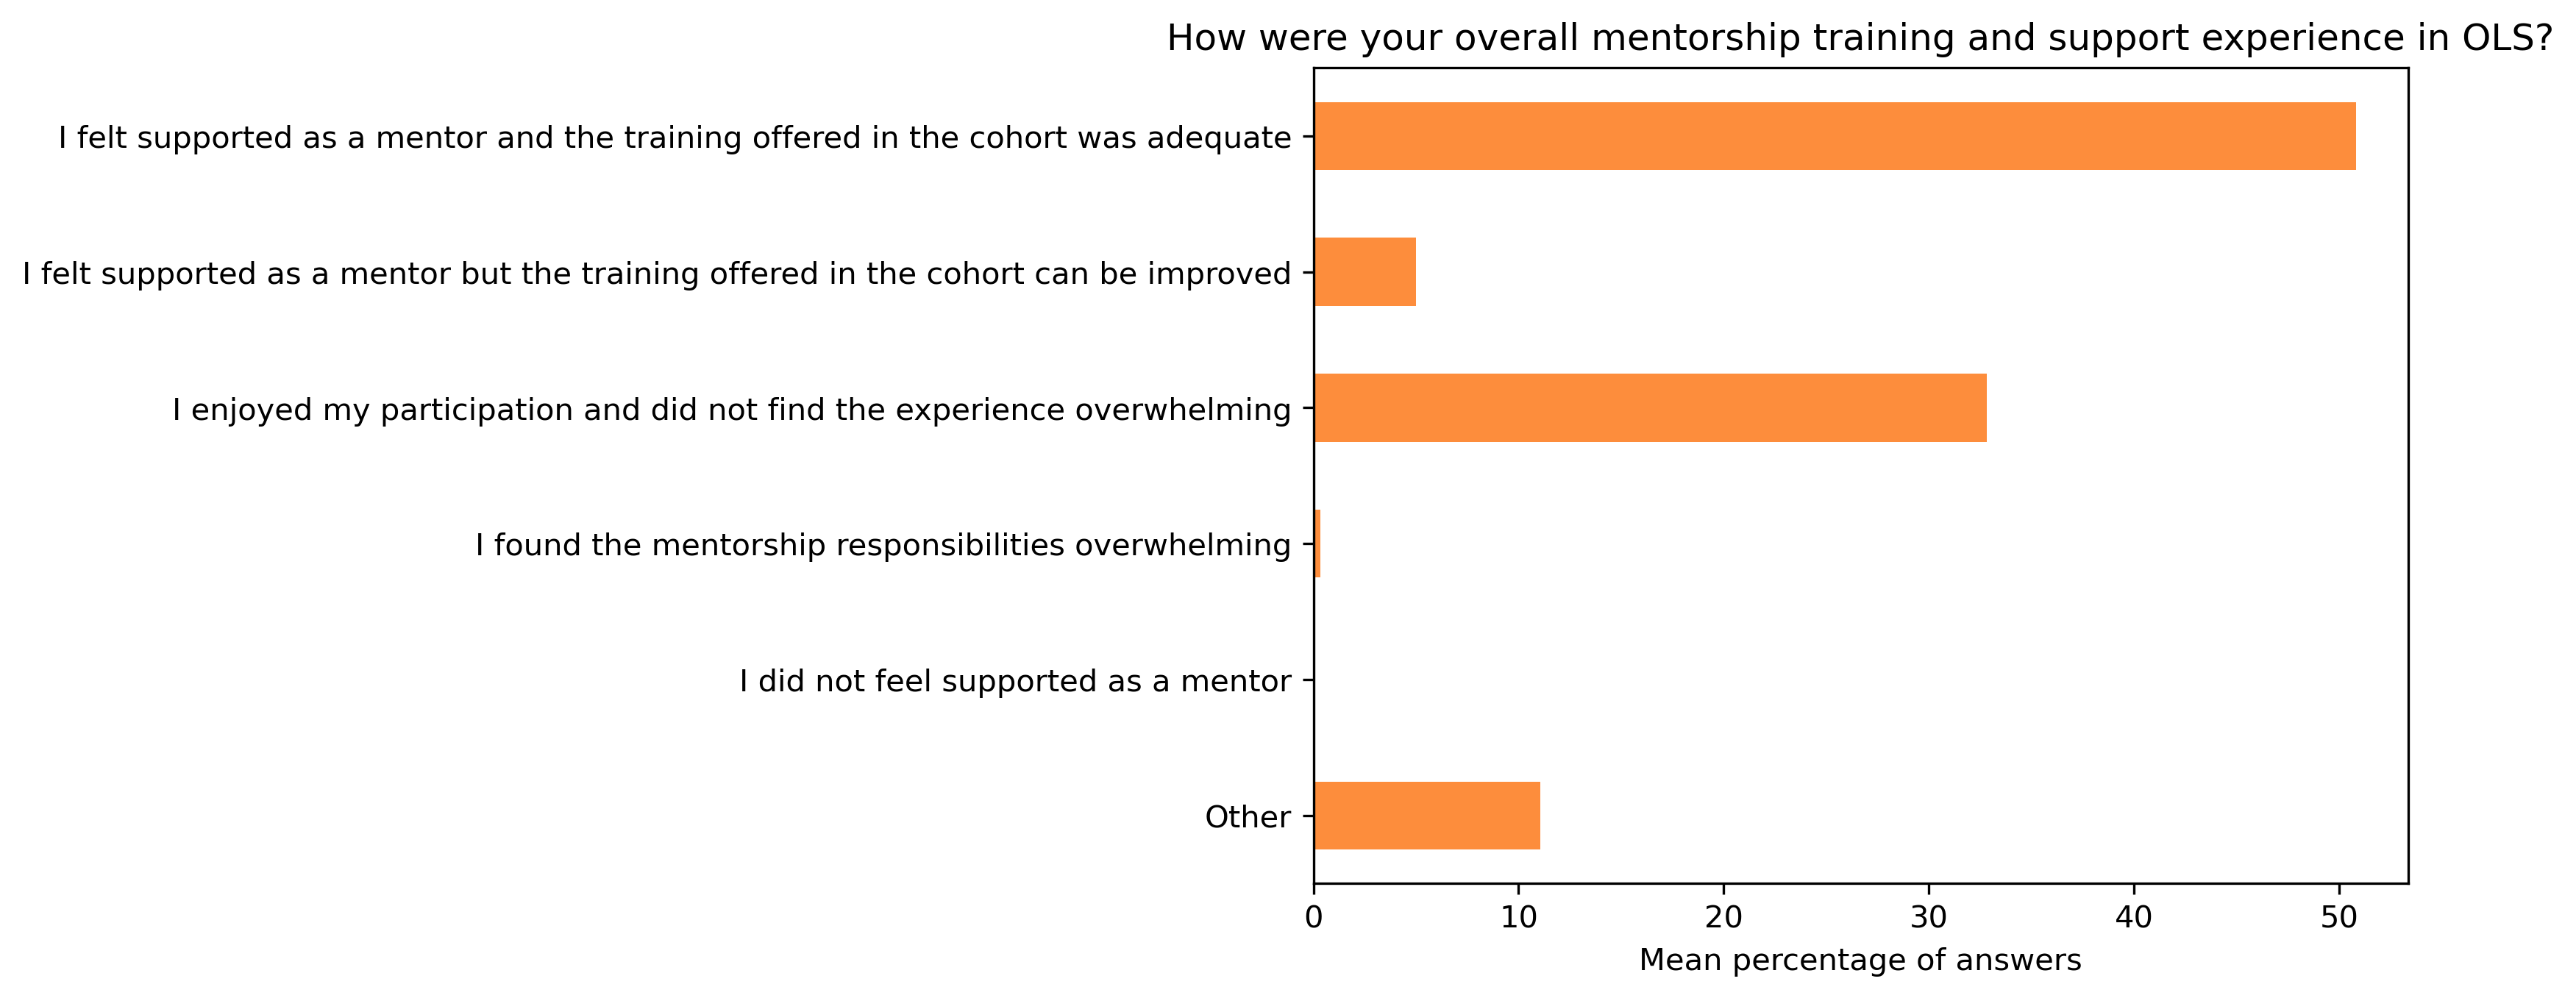

In [17]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q1_df.mean(axis=1).plot.barh(ax=ax, color=colors['mentors'])
plt.xlabel('Mean percentage of answers')
plt.gca().invert_yaxis()
t = plt.title(col)

#### "How was your overall experience with the mentoring calls with your mentee?"

In [18]:
mentor_q2 = {}
other_answer = []
col = "How was your overall experience with the mentoring calls with your mentee?"
answers = [
    "Mentoring calls were not structured or constructive",
    "Mentoring calls were somewhat constructive",
    "Mentoring calls were mostly constructive",
    "Mentoring calls were always constructive"]
for c in mentor_df:
    mentor_q2[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q2_df = pd.DataFrame.from_dict(mentor_q2)
mentor_q2_df = 100 * mentor_q2_df / mentor_q2_df.sum()
mentor_q2_df.transpose().describe()

,Mentoring calls were not structured or constructive,Mentoring calls were somewhat constructive,Mentoring calls were mostly constructive,Mentoring calls were always constructive
count,7.000000,7.000000,7.000000,7.000000
mean,2.929332,17.534526,41.428816,38.107326
std,3.036331,4.328734,13.983580,12.836553
min,0.000000,9.523810,15.384615,26.315789
25%,0.000000,15.740741,37.037037,27.350427
50%,3.703704,19.230769,47.368421,33.333333
75%,4.554656,20.141700,48.809524,47.354497
max,7.692308,22.222222,55.555556,57.692308


#### "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"

In [19]:
mentor_q3 = {}
other_answer = []
col = "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "Yes I am interesting in joining the OLS steering committee",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in mentor_df:
    mentor_q3[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q3_df = pd.DataFrame.from_dict(mentor_q3)
mentor_q3_df = 100 * mentor_q3_df / mentor_q3_df.sum()
mentor_q3_df.transpose().describe()

,Yes I'd like to return as a mentor,Yes I'd like to return as an expert,Yes I'd like to return as a collaborator to run this program in my network,Yes I am interesting in joining the OLS steering committee,I am not sure yet but ask me later,I would take a break but please keep me informed about the next cohort,No I would not be able to return,Other
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,28.667544,20.588996,3.971208,5.848005,7.448518,6.179595,0.396825,26.899308
std,14.156554,11.023938,4.457430,8.034182,7.333851,10.489760,1.049901,28.852860
min,1.234568,1.234568,0.000000,0.000000,0.000000,0.000000,0.000000,6.451613
25%,25.000000,15.972222,0.000000,0.000000,3.001792,0.000000,0.000000,10.790598
50%,29.032258,22.916667,3.225806,0.000000,6.250000,2.083333,0.000000,22.222222
75%,37.980769,27.884615,6.730769,10.790598,8.831909,6.003584,0.000000,23.958333
max,44.444444,32.258065,11.111111,19.354839,22.222222,29.166667,2.777778,90.123457


#### "Do you think your mentee was able to effectively engage with OLS throughout the program?"

In [20]:
mentor_q4 = {}
other_answer = []
col = "Do you think your mentee was able to effectively engage with OLS throughout the program?"
answers = [
    "Yes, they were able to engage",
    "No, they had difficulty engaging or attending calls",
    "Other"]
for c in mentor_df:
    if col in mentor_df[c]:
        mentor_q4[c], oa = get_question_possible_answers_counts(col, mentor_df[c], answers)
        other_answer += oa
mentor_q4_df = pd.DataFrame.from_dict(mentor_q4)
mentor_q4_df = 100 * mentor_q4_df / mentor_q4_df.sum()

Do you think your mentee was able to effectively engage with OLS throughout the program?
Yes, they were able to engage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 9
No, they had difficulty engaging or attending calls                                                                                                                                                                                                                                            

# Overview figure

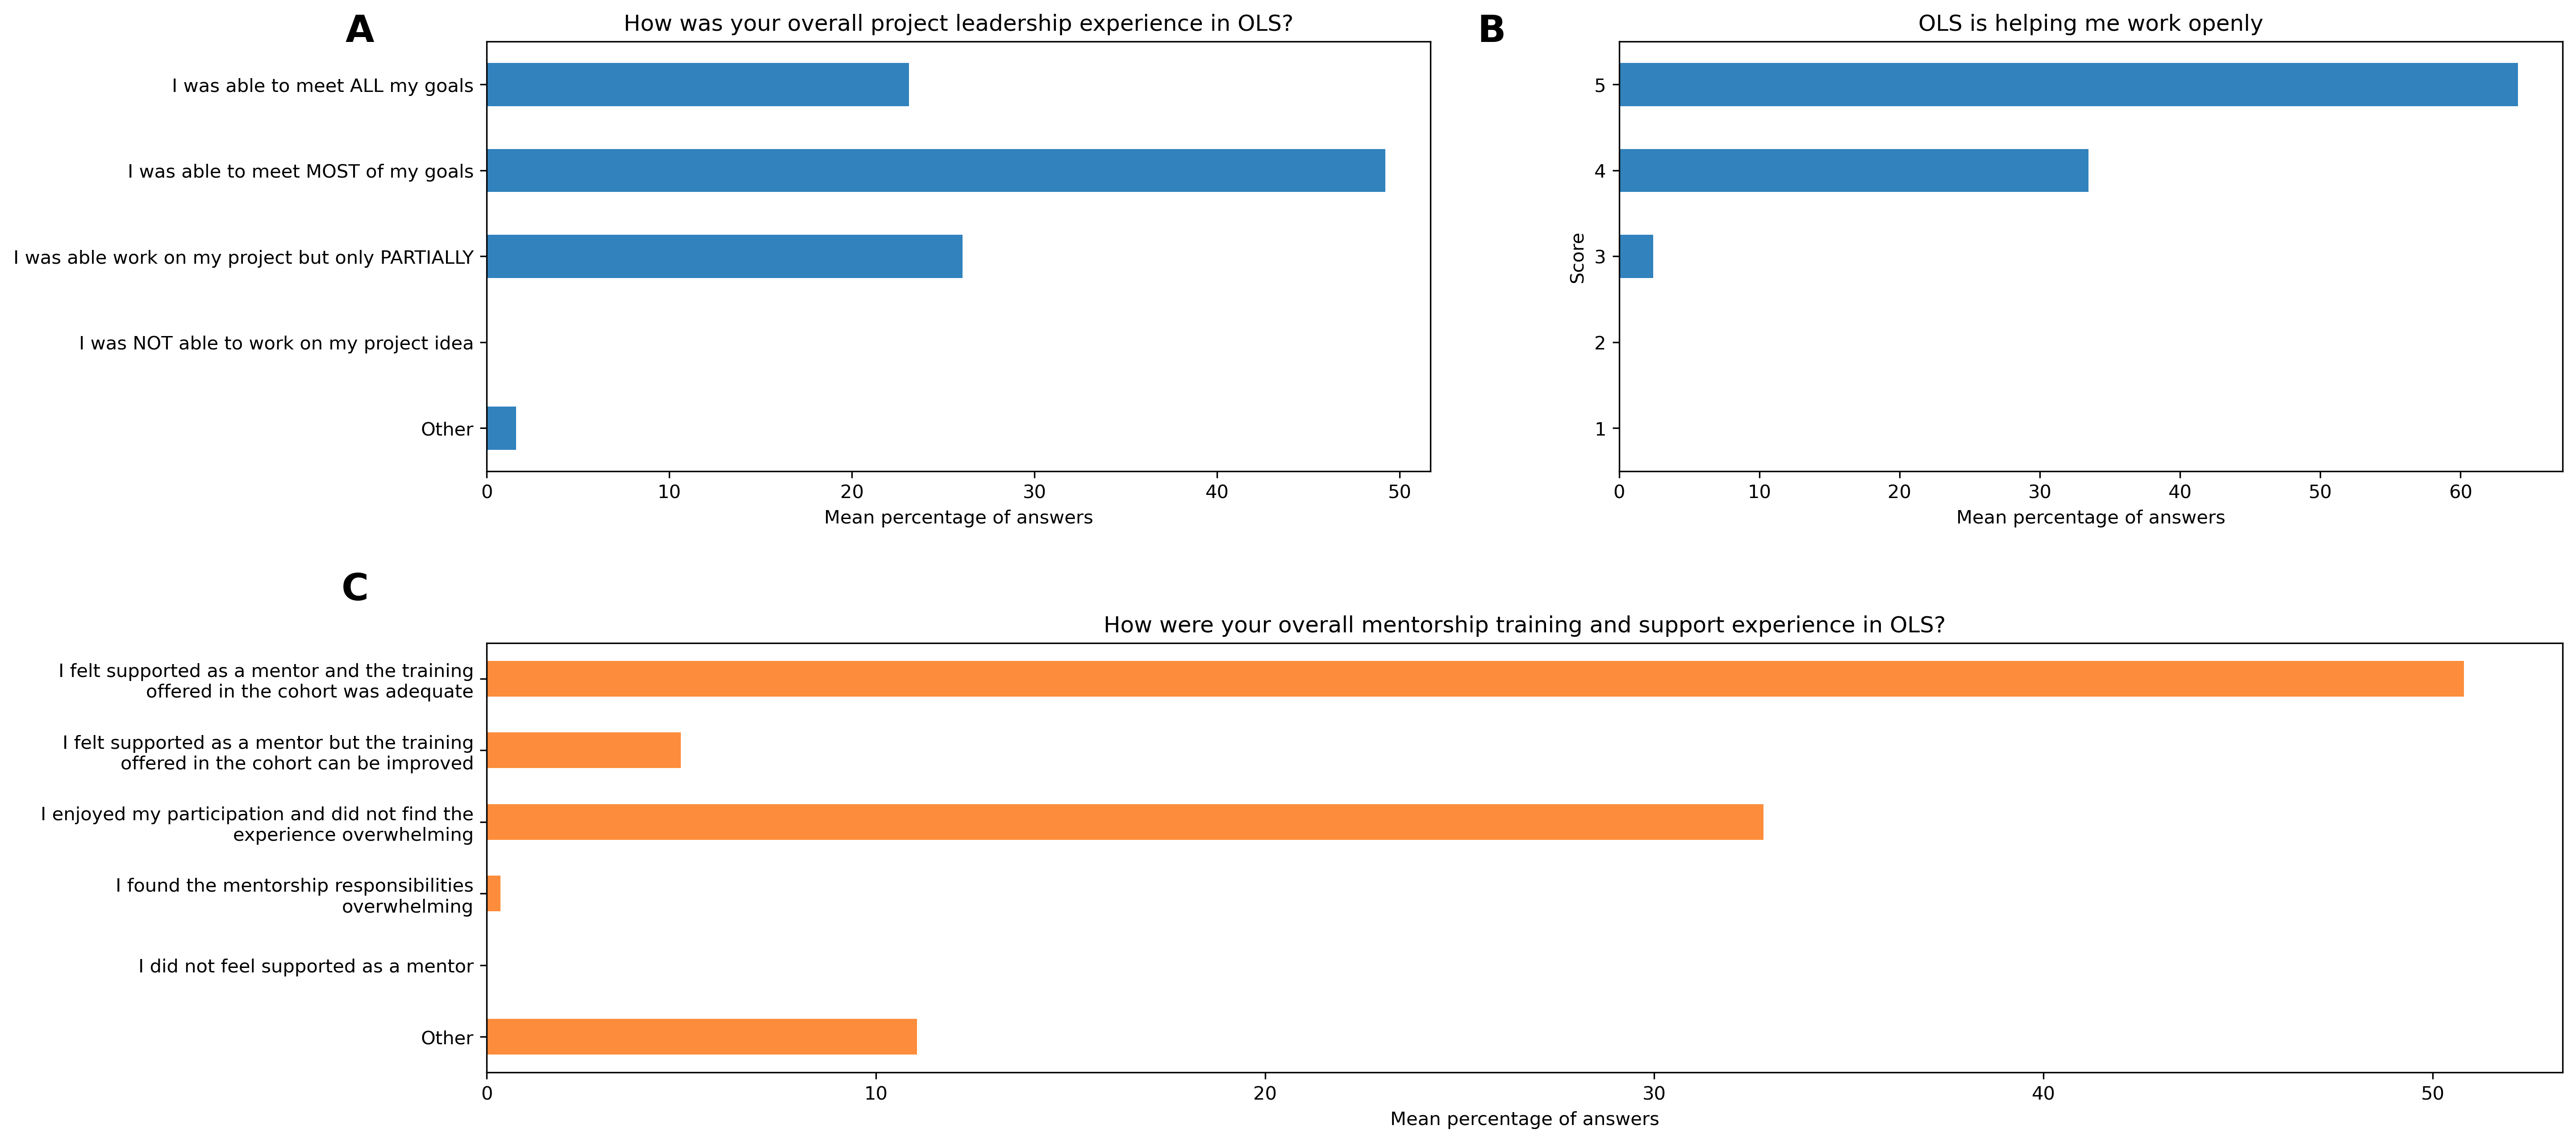

In [21]:
fig = plt.figure(dpi=300)

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# A
participant_q1_df.mean(axis=1).plot.barh(
    ax=ax1,
    color=colors['participants'],
    title="How was your overall project leadership experience in OLS?",
    figsize=(20, 10)
)
ax1.set_xlabel('Mean percentage of answers')
ax1.invert_yaxis()
ax1.text(-0.15, 1, "A", transform=ax1.transAxes, size=20, weight='bold')

# B
col = "OLS is helping me work openly"
participant_mid_q1_df.mean(axis=1).plot.barh(
    ax=ax2,
    color=colors['participants'],
    title="OLS is helping me work openly",
    figsize=(20, 10),
    rot=0
)
ax2.set_xlabel('Mean percentage of answers')
ax2.set_ylabel('Score')
ax2.text(-0.15, 1, "B", transform=ax2.transAxes, size=20, weight='bold')

# c
mentor_q1_df.index = ["\n".join(wrap(x, 50)) for x in mentor_q1_df.index]
mentor_q1_df.mean(axis=1).plot.barh(
    ax=ax3,
    color=colors['mentors'],
    title="How were your overall mentorship training and support experience in OLS?",
    figsize=(20, 10)
)
ax3.set_xlabel('Mean percentage of answers')
ax3.invert_yaxis()
ax3.text(-0.07, 1.1, "C", transform=ax3.transAxes, size=20, weight='bold')

#fig.tight_layout()
fig.subplots_adjust(hspace = 0.4)
fig.savefig(Path("../figures/figure-5-feedback.png"), bbox_inches='tight')